<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/3_GPT_evaluate_finetuning_multi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter



**Natalia Dedandi**


Esta notebook se usa para recuperar los batch de GPT luego de aplicarles el modelo con finetuning multilabel y evaluarlos en relación a los datos de test


La documentación de la API se encuentra aqui:

https://platform.openai.com/docs/api-reference/introduction



In [1]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.7/360.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00


In [2]:
!pip install datasets seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 require

In [3]:
import json
from openai import OpenAI
import os
from google.colab import userdata
#seteo la KEY
os.environ['OPENAI_API_KEY'] = userdata.get('openIA_key')




In [4]:
#creo el cliente OPENAI con mi usuario y proyecto
client = OpenAI(
  organization='org-1uHjwiaB3OlPzoxfVzhqOSzs',
  project='proj_2fII7izwVGgYaERNNKhhMx4l',
)


GPT no acepta archivos tan grandes por lo que se dividó la clasificacion en dos partes. Aqui se retoman los dos y se consolidan en un dataframe conjunto

BATCH ID Parte 1: batch_B8vfhAUNxb0TiUCJfJNxXSiD

BATCH ID Parte 2:batch_FyaWE6iHyjtyQkSSUi8R0WyP








In [5]:
batch_job1 = client.batches.retrieve('batch_B8vfhAUNxb0TiUCJfJNxXSiD')
batch_job1.status


'completed'

In [6]:
batch_job2 = client.batches.retrieve('batch_FyaWE6iHyjtyQkSSUi8R0WyP')
batch_job2.status


'completed'

In [7]:
##batch job 1

output_file_id = batch_job1.output_file_id
# We should check that there are succesfull results
	# It could be the case that all responses are errors.
if output_file_id:
	outputs = client.files.content(output_file_id).content
	result_file_name = "outputs1.jsonl"

	with open(result_file_name, 'wb') as file:
	    file.write(outputs)



In [8]:
import pandas as pd

data_results = []
with open(result_file_name, 'r') as file:
  for line in file:
      output = json.loads(line.strip())
      id=output["custom_id"]
      sentiment= output["response"]["body"]["choices"][0]["message"]["content"]
      data_results.append({'id': id, 'sentiment_gpt': sentiment})
      gpt_response = output["response"]["body"]["choices"][0]["message"]["content"]
      #print(gpt_response)

df_results1 = pd.DataFrame(data_results)

In [9]:
df_results1[1:10]

,id,sentiment_gpt
1,397704,
2,397705,
3,397706,
4,397707,
5,397708,
6,397709,
7,397710,
8,397711,
9,397712,


In [10]:
len(df_results1)

5671

In [11]:
##batch job 2

output_file_id = batch_job2.output_file_id
# We should check that there are succesfull results
	# It could be the case that all responses are errors.
if output_file_id:
	outputs = client.files.content(output_file_id).content
	result_file_name = "outputs2.jsonl"

	with open(result_file_name, 'wb') as file:
	    file.write(outputs)

In [12]:
import pandas as pd

data_results = []
with open(result_file_name, 'r') as file:
  for line in file:
      output = json.loads(line.strip())
      id=output["custom_id"]
      sentiment= output["response"]["body"]["choices"][0]["message"]["content"]
      data_results.append({'id': id, 'sentiment_gpt': sentiment})
      gpt_response = output["response"]["body"]["choices"][0]["message"]["content"]
      #print(gpt_response)

df_results2 = pd.DataFrame(data_results)

In [13]:
df_results2[1:10]

,id,sentiment_gpt
1,406491,WOMEN
2,406492,
3,406493,
4,406494,"WOMEN, RACISM, POLITICS"
5,406495,LGBTI
6,406496,
7,406497,
8,406498,
9,406499,


In [14]:
len(df_results2)

5671

In [15]:
# prompt: merge df_results1 with df_results2

df_results = pd.concat([df_results1, df_results2], ignore_index=True)


In [16]:
len(df_results)

11342

In [17]:
df_results["id"] = pd.to_numeric(df_results["id"])

In [18]:
df_results.groupby(['sentiment_gpt']).size()

,0
sentiment_gpt,
,9737
APPEARANCE,258
"APPEARANCE, CRIMINAL",1
"CALLS, APPEARANCE",7
"CALLS, APPEARANCE, CRIMINAL",2
...,...
"WOMEN, POLITICS",9
"WOMEN, POLITICS, APPEARANCE",1
"WOMEN, RACISM",2


In [19]:
import re

def word_in_text(word, text):
    # Use re.search() to find the word in the text
    pattern = r'\b{}\b'.format(re.escape(word))  # \b matches word boundaries
    match = re.search(pattern, text, flags=re.IGNORECASE)  # Ignore case for case-insensitive matching

    if match:
        return True
    else:
        return False

In [20]:
# ajustar los valores y crear una variable binaria entera 1 y 0
df_results['CALLS_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('calls',x) else 0)
df_results['WOMEN_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('women',x) else 0)
df_results['LGBTI_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('lgbti',x) else 0)
df_results['RACISM_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('racism',x) else 0)
df_results['CLASS_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('class',x) else 0)
df_results['POLITICS_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('politics',x) else 0)
df_results['DISABLED_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('disabled',x) else 0)
df_results['APPEARANCE_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('appearance',x) else 0)
df_results['CRIMINAL_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('criminal',x) else 0)

In [21]:
df_results['HATEFUL_pred']= df_results[['CALLS_pred','WOMEN_pred','LGBTI_pred','RACISM_pred','CLASS_pred','POLITICS_pred','DISABLED_pred','APPEARANCE_pred','CRIMINAL_pred']].max(axis=1)


In [22]:
df_results.groupby(['HATEFUL_pred']).size()

,0
HATEFUL_pred,
0,9737
1,1605


In [23]:
df_results.to_csv('GPT3_FT_results.csv',index=False)

,0
HATEFUL_pred,
0,9737
1,1605


In [ ]:
from datasets import load_dataset
import pandas as pd

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/36420 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11343 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [ ]:
df_test = pd.DataFrame(ds1['test'])
df_test[1:10]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,0,0,0,0,0
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
5,397708,Mora Godoy cierra su escuela de tango y remata...,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
6,397709,Mora Godoy cierra su escuela de tango y remata...,@usuario Que se joda,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
7,397710,Mora Godoy cierra su escuela de tango y remata...,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
8,397711,Mora Godoy cierra su escuela de tango y remata...,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
9,397712,Mora Godoy cierra su escuela de tango y remata...,@usuario TUGO,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0


In [ ]:
df_results[0:10]

,id,sentiment_gpt,CALLS_pred,WOMEN_pred,LGBTI_pred,RACISM_pred,CLASS_pred,POLITICS_pred,DISABLED_pred,APPEARANCE_pred,CRIMINAL_pred,HATEFUL_pred
0,397703,,0,0,0,0,0,0,0,0,0,0
1,397704,,0,0,0,0,0,0,0,0,0,0
2,397705,,0,0,0,0,0,0,0,0,0,0
3,397706,,0,0,0,0,0,0,0,0,0,0
4,397707,,0,0,0,0,0,0,0,0,0,0
5,397708,,0,0,0,0,0,0,0,0,0,0
6,397709,,0,0,0,0,0,0,0,0,0,0
7,397710,,0,0,0,0,0,0,0,0,0,0
8,397711,,0,0,0,0,0,0,0,0,0,0
9,397712,,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(df_test)

11343

In [ ]:
len(df_results)

11342

In [ ]:
#junto los dos dataframes
df_hateful=df_test.merge(df_results,how='left', on='id')
df_hateful[0:10]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,...,CALLS_pred,WOMEN_pred,LGBTI_pred,RACISM_pred,CLASS_pred,POLITICS_pred,DISABLED_pred,APPEARANCE_pred,CRIMINAL_pred,HATEFUL_pred
0,397703,Mora Godoy cierra su escuela de tango y remata...,@usuario Ojalá se funda y cague de hambre,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,397708,Mora Godoy cierra su escuela de tango y remata...,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,397709,Mora Godoy cierra su escuela de tango y remata...,@usuario Que se joda,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,397710,Mora Godoy cierra su escuela de tango y remata...,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,397711,Mora Godoy cierra su escuela de tango y remata...,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,397712,Mora Godoy cierra su escuela de tango y remata...,@usuario TUGO,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df_hateful)

11343

In [ ]:
# prompt: delete a row from df_hateful if HATEFUL_pred is NA

df_hateful = df_hateful.dropna(subset=['HATEFUL_pred'])


In [ ]:
len(df_hateful)

11342

In [ ]:
df_hateful.groupby(['HATEFUL_pred']).size()

,0
HATEFUL_pred,
0.0,9737
1.0,1605


In [ ]:
df_hateful['HATEFUL_pred'] = df_hateful['HATEFUL_pred'].astype(int)
df_hateful['CALLS_pred'] = df_hateful['CALLS_pred'].astype(int)
df_hateful['WOMEN_pred'] = df_hateful['WOMEN_pred'].astype(int)
df_hateful['LGBTI_pred'] = df_hateful['LGBTI_pred'].astype(int)
df_hateful['RACISM_pred'] = df_hateful['RACISM_pred'].astype(int)
df_hateful['CLASS_pred'] = df_hateful['CLASS_pred'].astype(int)
df_hateful['POLITICS_pred'] = df_hateful['POLITICS_pred'].astype(int)
df_hateful['DISABLED_pred'] = df_hateful['DISABLED_pred'].astype(int)
df_hateful['APPEARANCE_pred'] = df_hateful['APPEARANCE_pred'].astype(int)
df_hateful['CRIMINAL_pred'] = df_hateful['CRIMINAL_pred'].astype(int)



<ipython-input-39-ed43efad24f9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x='HATEFUL', y='HATEFUL_pred', inner='stick', palette='Dark2')


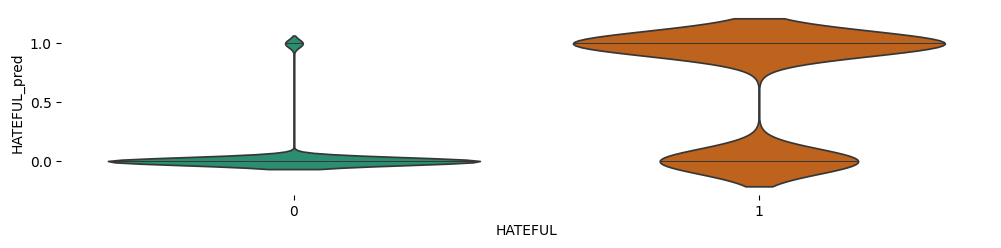

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_hateful['HATEFUL_pred'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_hateful, x='HATEFUL', y='HATEFUL_pred', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Probando los resultados en una de las etiquetas: CALLS

<ipython-input-40-3f0ffa9f0249>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x='CALLS', y='CALLS_pred', inner='stick', palette='Dark2')


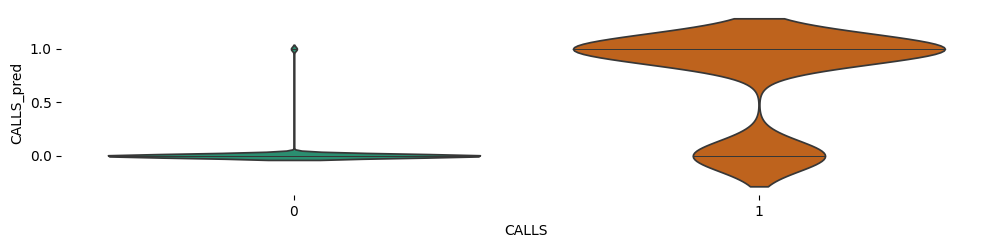

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_hateful['CALLS_pred'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_hateful, x='CALLS', y='CALLS_pred', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# prompt: print names of df_hateful columns

print(df_hateful.columns)


Index(['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS',
       'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED',
       'APPEARANCE', 'CRIMINAL', 'sentiment_gpt', 'CALLS_pred', 'WOMEN_pred',
       'LGBTI_pred', 'RACISM_pred', 'CLASS_pred', 'POLITICS_pred',
       'DISABLED_pred', 'APPEARANCE_pred', 'CRIMINAL_pred', 'HATEFUL_pred'],
      dtype='object')


<ipython-input-42-d3d85a58e69b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x=feature, y=feature + '_pred', inner='stick', palette='Dark2', ax=axes[i])
<ipython-input-42-d3d85a58e69b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x=feature, y=feature + '_pred', inner='stick', palette='Dark2', ax=axes[i])
<ipython-input-42-d3d85a58e69b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x=feature, y=feature + '_pred', inner='stick', palette='Dark2', ax=axes[i])
<ipython-input-42-d3d85a58e6

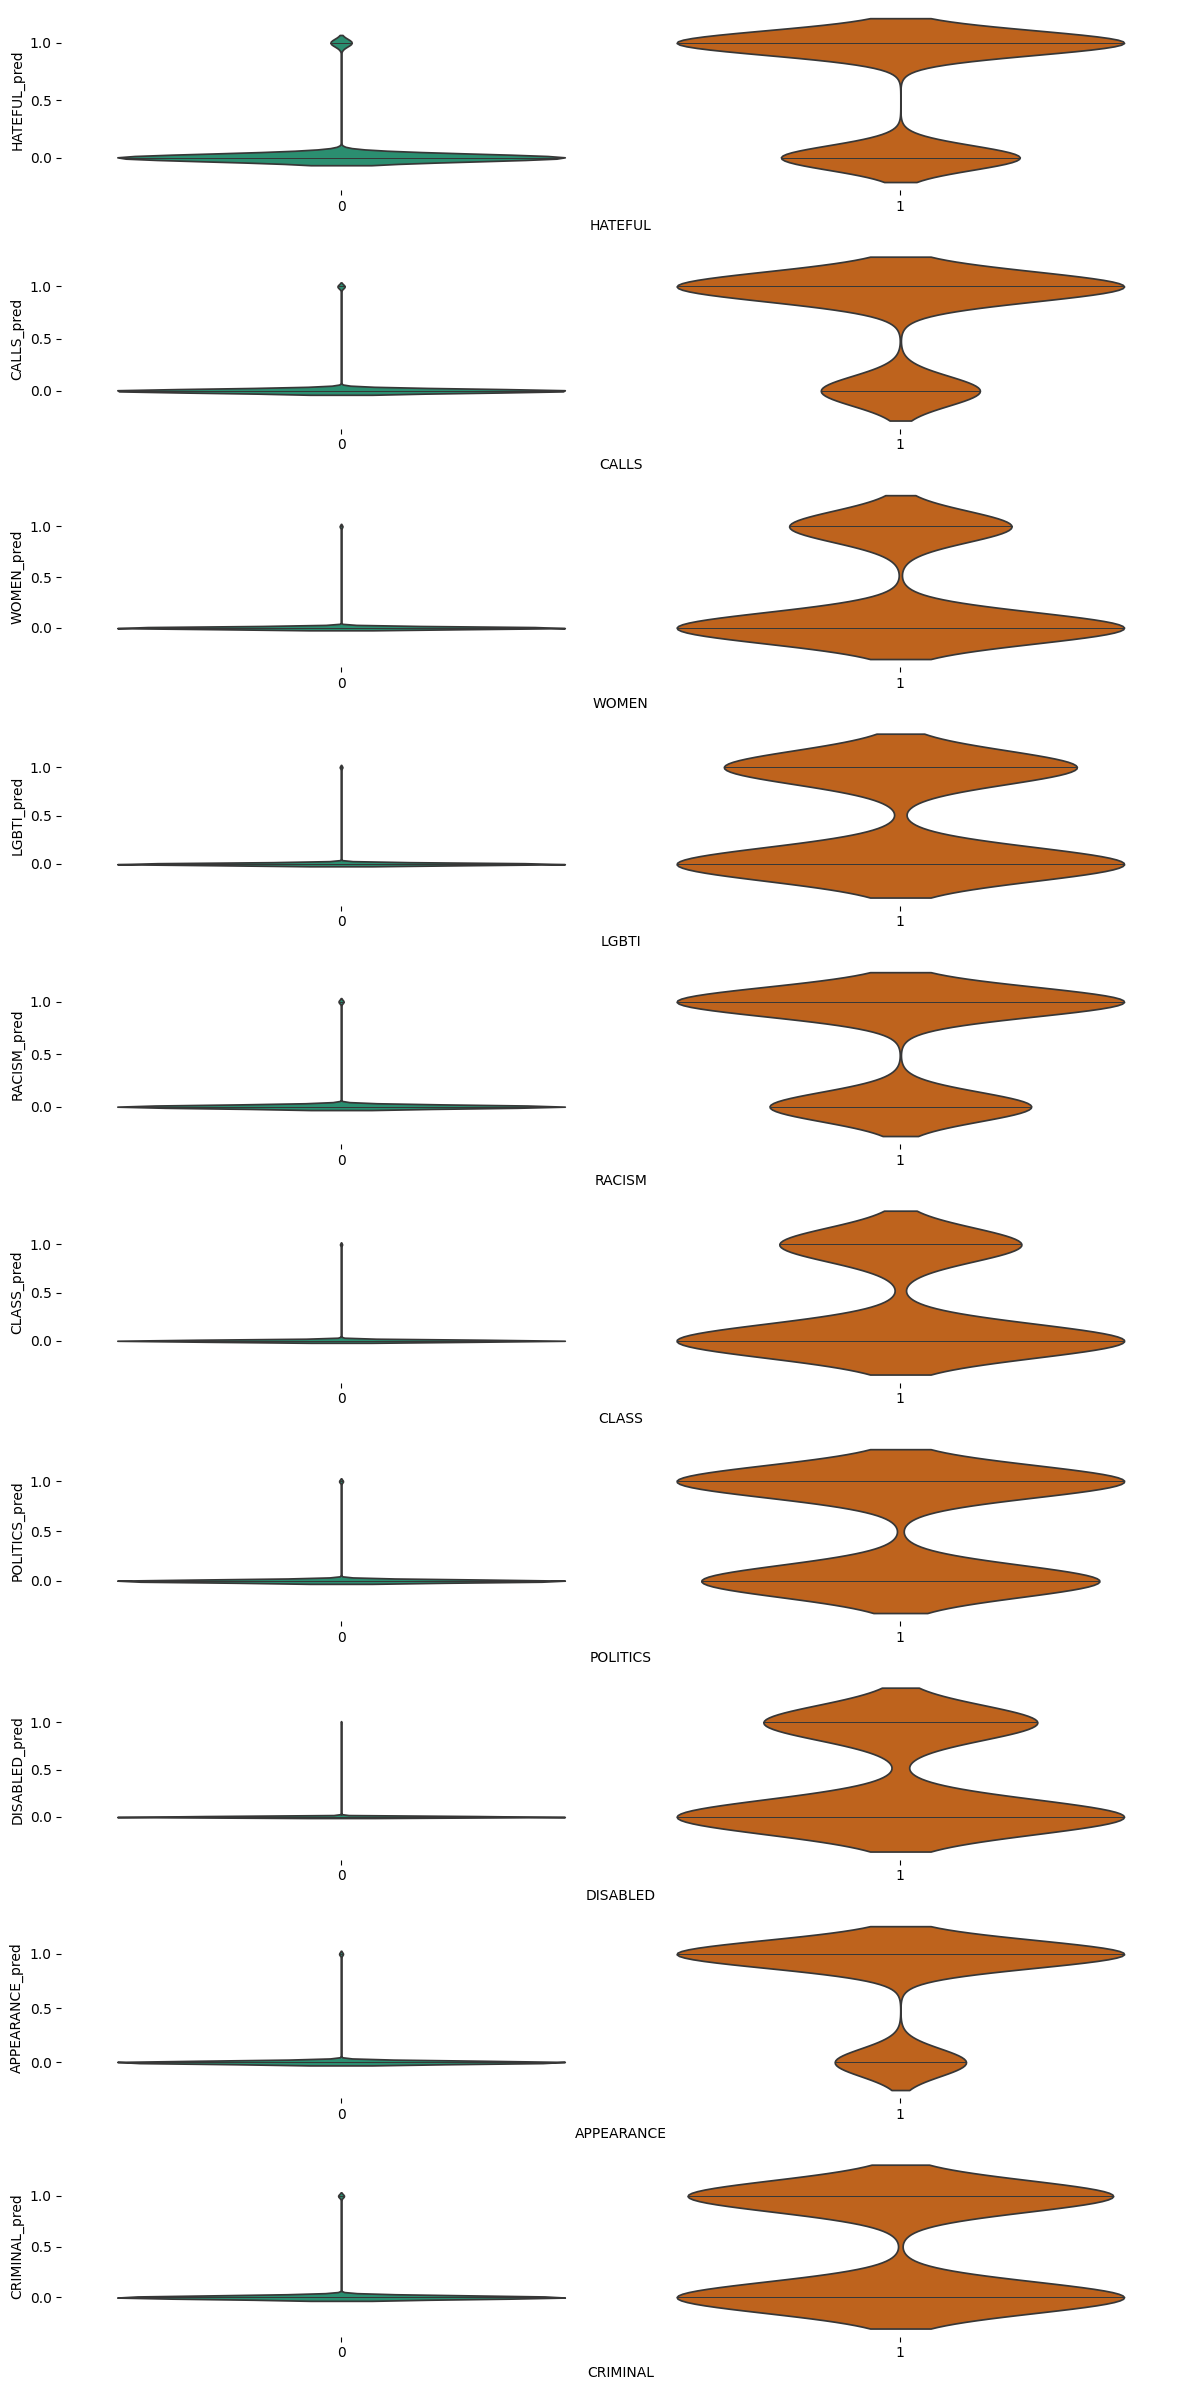

In [ ]:
# prompt: construc violinplot for features: 'HATEFUL', 'CALLS',  'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL' in df_hateful and the same column that have the text '_pred'. show it as a grid of graphs

import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features = ['HATEFUL', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL']

# Create a grid of violin plots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(12, 1.2 * len(features) * len(df_hateful['HATEFUL_pred'].unique())))

for i, feature in enumerate(features):
    sns.violinplot(df_hateful, x=feature, y=feature + '_pred', inner='stick', palette='Dark2', ax=axes[i])
    sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[i])

plt.tight_layout()
plt.show()


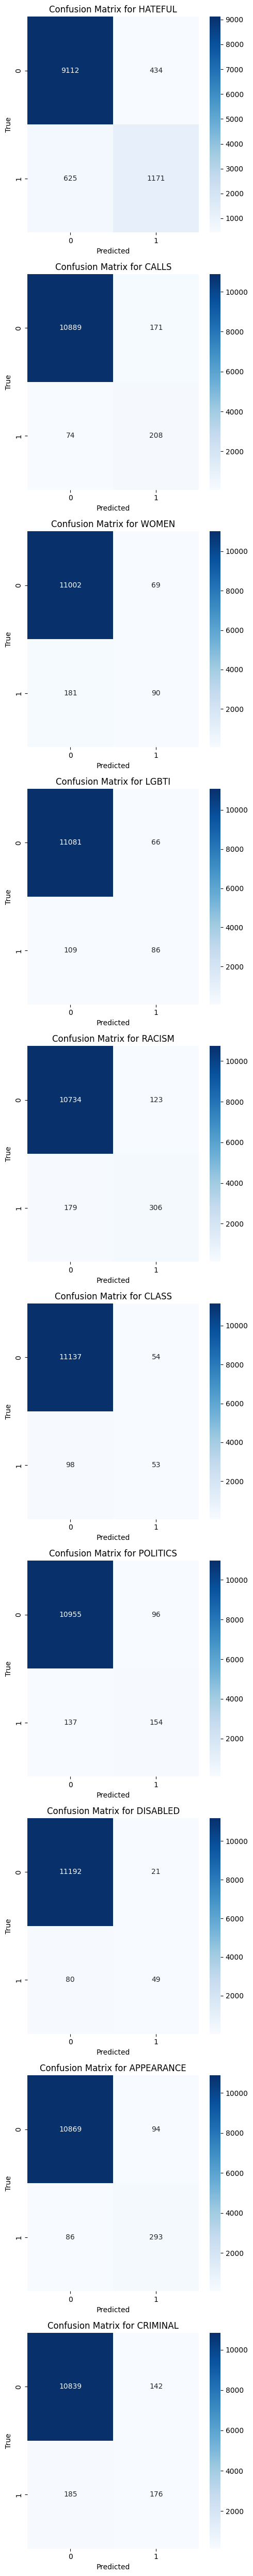

In [ ]:
# prompt: a confusion matrix for the features  'HATEFUL', 'CALLS',  'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL' in df_hateful and the same column that have the text '_pred'.

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features = ['HATEFUL', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL']

# Create a grid of confusion matrices
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(5, 5 * len(features)))

for i, feature in enumerate(features):
    # Calculate the confusion matrix
    cm = confusion_matrix(df_hateful[feature], df_hateful[feature + '_pred'])

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].set_title(f'Confusion Matrix for {feature}')

plt.tight_layout()
plt.show()


CALCULO LAS METRICAS DE CADA UNA DE LAS ETIQUETAS

In [ ]:
#df_hateful.to_csv('gpt_multiclass_clasif.csv',index=False)

In [ ]:
# prompt: calculate accuracy, precision, recall and F1 for ecah features  'HATEFUL', 'CALLS',  'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL' in df_hateful comparing the  the same column that have the text '_pred'.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the features to evaluate
features = ['HATEFUL', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL']

# Calculate and print the metrics for each feature
metrics=[]
for feature in features:
    accuracy = accuracy_score(df_hateful[feature], df_hateful[feature + '_pred'])
    precision = precision_score(df_hateful[feature], df_hateful[feature + '_pred'])
    recall = recall_score(df_hateful[feature], df_hateful[feature + '_pred'])
    f1 = f1_score(df_hateful[feature], df_hateful[feature + '_pred'])
    auc = roc_auc_score(df_hateful[feature], df_hateful[feature + '_pred'])
    metrics.append([feature,accuracy,precision,recall,f1,auc])

    print(f"Metrics for {feature}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  AUC: {auc:.4f}")
    print()


Metrics for HATEFUL:
  Accuracy: 0.9066
  Precision: 0.7296
  Recall: 0.6520
  F1-score: 0.6886
  AUC: 0.8033

Metrics for CALLS:
  Accuracy: 0.9784
  Precision: 0.5488
  Recall: 0.7376
  F1-score: 0.6293
  AUC: 0.8611

Metrics for WOMEN:
  Accuracy: 0.9780
  Precision: 0.5660
  Recall: 0.3321
  F1-score: 0.4186
  AUC: 0.6629

Metrics for LGBTI:
  Accuracy: 0.9846
  Precision: 0.5658
  Recall: 0.4410
  F1-score: 0.4957
  AUC: 0.7176

Metrics for RACISM:
  Accuracy: 0.9734
  Precision: 0.7133
  Recall: 0.6309
  F1-score: 0.6696
  AUC: 0.8098

Metrics for CLASS:
  Accuracy: 0.9866
  Precision: 0.4953
  Recall: 0.3510
  F1-score: 0.4109
  AUC: 0.6731

Metrics for POLITICS:
  Accuracy: 0.9795
  Precision: 0.6160
  Recall: 0.5292
  F1-score: 0.5693
  AUC: 0.7603

Metrics for DISABLED:
  Accuracy: 0.9911
  Precision: 0.7000
  Recall: 0.3798
  F1-score: 0.4925
  AUC: 0.6890

Metrics for APPEARANCE:
  Accuracy: 0.9841
  Precision: 0.7571
  Recall: 0.7731
  F1-score: 0.7650
  AUC: 0.8823

Metri

bajo las metricas

In [ ]:
df_metrics = pd.DataFrame(metrics)


df_metrics.to_csv('metrics_1.csv',index=False)

Otra forma de mostrar las metricas

In [ ]:
# prompt: Calculate and print metrics for a multiclass classification problem in df_hateful, with y_true as:   'HATEFUL', 'CALLS',  'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'
#  and y_pred the same column that have the text '_pred'

from sklearn.metrics import classification_report

# Define the features to evaluate
features = ['HATEFUL', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL']

# Calculate and print the metrics for each feature
for feature in features:
    print(f"Classification report for {feature}:")
    print(classification_report(df_hateful[feature], df_hateful[feature + '_pred']))
    print()


Classification report for HATEFUL:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      9546
           1       0.73      0.65      0.69      1796

    accuracy                           0.91     11342
   macro avg       0.83      0.80      0.82     11342
weighted avg       0.90      0.91      0.90     11342


Classification report for CALLS:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     11060
           1       0.55      0.74      0.63       282

    accuracy                           0.98     11342
   macro avg       0.77      0.86      0.81     11342
weighted avg       0.98      0.98      0.98     11342


Classification report for WOMEN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11071
           1       0.57      0.33      0.42       271

    accuracy                           0.98     11342
   macro avg       0.77  

**Calculo las metricas MACRO de todo el modelo, teniendo en cuenta todas las clasificaciones**

In [ ]:
# prompt: calculate macro F1 macro precission and macro recall for  df_hateful, with y_true as:   'HATEFUL', 'CALLS',  'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'
#  and y_pred the same column that have the text '_pred'

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score

# Define the features to evaluate
features = ['HATEFUL', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL']

# Calculate macro-averaged metrics
f1_macro = f1_score(df_hateful[features], df_hateful[[f"{feature}_pred" for feature in features]], average='macro')
precision_macro = precision_score(df_hateful[features], df_hateful[[f"{feature}_pred" for feature in features]], average='macro')
recall_macro = recall_score(df_hateful[features], df_hateful[[f"{feature}_pred" for feature in features]], average='macro')
accuracy_macro = accuracy_score(df_hateful[features], df_hateful[[f"{feature}_pred" for feature in features]])
AUC_macro = roc_auc_score(df_hateful[features], df_hateful[[f"{feature}_pred" for feature in features]], average='macro')


# Print the results
print("Macro F1-score:", f1_macro)
print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)
print("Macro Accuracy:", accuracy_macro)
print("Macro AUC:", AUC_macro)



Macro F1-score: 0.565789018051652
Macro Precision: 0.6245413768757004
Macro Recall: 0.5314319561931419
Macro Accuracy: 0.8728619291130312
Macro AUC: 0.7596510524735794
